# HW 5 Convolutional neural networks for image coloring

## A.

In [2]:

import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict




def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#(a.)
batch1 = unpickle("C:/Users/simeon/Desktop/cifar-10-batches-py/data_batch_1")

batch2 = unpickle("C:/Users/simeon/Desktop/cifar-10-batches-py/data_batch_2")

batch3 = unpickle("C:/Users/simeon/Desktop/cifar-10-batches-py/data_batch_3")

batch4 = unpickle("C:/Users/simeon/Desktop/cifar-10-batches-py/data_batch_4")

batch5 = unpickle("C:/Users/simeon/Desktop/cifar-10-batches-py/data_batch_5")
test_batch = unpickle("C:/Users/simeon/Desktop/cifar-10-batches-py/test_batch")

batch_meta = unpickle("C:/Users/simeon/Desktop/cifar-10-batches-py/batches.meta")



## B. 

in this section, I reshape and transform the data from its original state to create vectors that are acutal images. to make sure that the data is in the right format, i plot one of the images

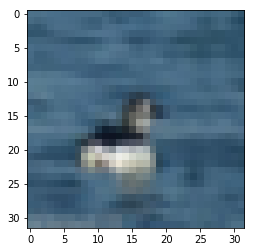

In [3]:
# according to the dictionary, label 3 is the birds 

#figuring out how to use dictionaries and subset data
len(batch1)

b'batch_label'in batch1
batch1[b'batch_label']
batch1[b'labels']
batch1[b'data']
batch1[b'filenames']

len(batch1[b'labels'])
len(batch1[b'data'])
len(batch1[b'filenames'])


list(batch1)
batch1.keys()




features1 = batch1[b'data'].reshape((len(batch1[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
labels1 = batch1[b'labels']
features2 = batch2[b'data'].reshape((len(batch1[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
labels2 = batch2[b'labels']
features3 = batch3[b'data'].reshape((len(batch1[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
labels3 = batch3[b'labels']
features4 = batch4[b'data'].reshape((len(batch1[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
labels4 = batch4[b'labels']
features5 = batch5[b'data'].reshape((len(batch1[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
labels5= batch5[b'labels']
features6 = test_batch[b'data'].reshape((len(batch1[b'data']), 3, 32, 32)).transpose(0, 2, 3, 1)
labels6 = test_batch[b'labels']





#labels1.index(10)

#labels1[6]
#len(features1[0][0][0])


indices = [i for i, x in enumerate(labels1) if x == 2]
features1 = features1[indices]

indices = [i for i, x in enumerate(labels2) if x == 2]
features2 = features2[indices]
indices = [i for i, x in enumerate(labels3) if x == 2]
features3 = features3[indices]
indices = [i for i, x in enumerate(labels4) if x == 2]
features4 = features4[indices]
indices = [i for i, x in enumerate(labels5) if x == 2]
features5 = features5[indices]
indices = [i for i, x in enumerate(labels6) if x == 2]
features6 = features6[indices]

birds = np.vstack((features1,features2, features3, features4, features5, features6))


sample_image = features1[6]


plt.imshow(sample_image)


## C. 

I chose to use all of the pixels to find the most common colors

In [4]:

birds_pixels = np.reshape(birds,(6144000,3) )


## D. 

[[109 109  83]
 [207 212 212]
 [156 156 136]
 [ 49  50  38]]


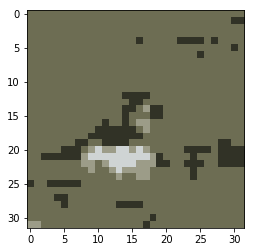

In [5]:

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters = 4)
kmeans.fit(birds_pixels)


COLORS = kmeans.cluster_centers_
COLORS = COLORS.astype(int)

print(COLORS)
labels = kmeans.predict(birds_pixels)

bs = COLORS[labels]

birds_4_colors = np.reshape(
        COLORS[labels], (6000,32, 32, COLORS.shape[1]))


sample_image = birds_4_colors[6]
sample_image2 = birds[6]

plt.imshow(sample_image)



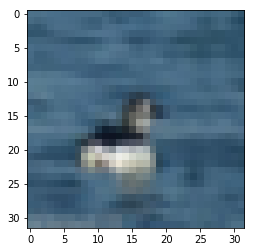

In [6]:

plt.imshow(sample_image2)


As we can see, the clustering was successful and we now have the image with only 4 colors, the only issue is that these colors are ugly. 

## E.

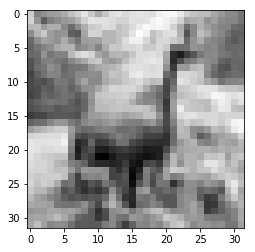

In [7]:
from skimage.color import rgb2gray

gray_birds = rgb2gray(birds)


sample_image = gray_birds[0]
sample_image2 = birds[0]

plt.imshow(sample_image,cmap="gray")




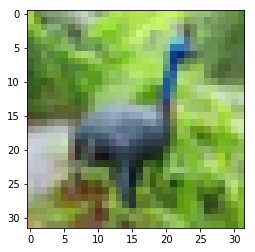

In [8]:
plt.imshow(sample_image2)

we now have successfully converted the images to grayscale

## F.

 basically we are trying to classify each pixel as 1 of 4 colors.
sorry to dissapoint but i am using keras because i dont plan on doing this for my future job or doing research in this area,

to increase the computing time i installed tenserflow-gpu, because my laptop has a nvidia gpu, this increase the computing speed greatly, and allowed me to train many more epochs 

In [39]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer, Reshape
from keras.layers import Conv2D, MaxPooling2D, Conv1D , UpSampling2D
import keras 


model = Sequential()
model.add(Conv2D(32, (5, 5), padding = 'valid',activation='relu', input_shape=(32, 32, 1)))
model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(4500, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Reshape((32,32,4)))
model.add(Activation('softmax'))
model.compile(optimizer='rmsprop',loss='mse')
model.summary()


history = model.fit(x, y, validation_split=0.2, epochs=10, batch_size=32)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_55 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 24, 24, 32)        25632     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 4500)              4612500   
__________

Train on 4800 samples, validate on 1200 samples
Epoch 1/100
4800/4800 [==============================] - 3s 546us/step - loss: 0.1819 - val_loss: 0.1658
Epoch 2/100
4800/4800 [==============================] - 2s 364us/step - loss: 0.1446 - val_loss: 0.1315
Epoch 3/100
4800/4800 [==============================] - 2s 367us/step - loss: 0.1315 - val_loss: 0.1200
Epoch 4/100
4800/4800 [==============================] - 2s 358us/step - loss: 0.1244 - val_loss: 0.1183
Epoch 5/100
4800/4800 [==============================] - 2s 355us/step - loss: 0.1189 - val_loss: 0.1148
Epoch 6/100
4800/4800 [==============================] - 2s 366us/step - loss: 0.1150 - val_loss: 0.1103
Epoch 7/100
4800/4800 [==============================] - 2s 361us/step - loss: 0.1115 - val_loss: 0.1091
Epoch 8/100
4800/4800 [==============================] - 2s 362us/step - loss: 0.1088 - val_loss: 0.1318
Epoch 9/100
4800/4800 [==============================] - 2s 363us/step - loss: 0.1069 - val_loss: 0.1193
Epoch 1

Epoch 78/100
4800/4800 [==============================] - 2s 363us/step - loss: 0.0754 - val_loss: 0.1038
Epoch 79/100
4800/4800 [==============================] - 2s 362us/step - loss: 0.0750 - val_loss: 0.1005
Epoch 80/100
4800/4800 [==============================] - 2s 362us/step - loss: 0.0752 - val_loss: 0.0999
Epoch 81/100
4800/4800 [==============================] - 2s 370us/step - loss: 0.0749 - val_loss: 0.0954
Epoch 82/100
4800/4800 [==============================] - 2s 367us/step - loss: 0.0750 - val_loss: 0.0981
Epoch 83/100
4800/4800 [==============================] - 2s 372us/step - loss: 0.0747 - val_loss: 0.0933
Epoch 84/100
4800/4800 [==============================] - 2s 392us/step - loss: 0.0747 - val_loss: 0.0943
Epoch 85/100
4800/4800 [==============================] - 2s 379us/step - loss: 0.0746 - val_loss: 0.0954
Epoch 86/100
4800/4800 [==============================] - 2s 370us/step - loss: 0.0745 - val_loss: 0.0951
Epoch 87/100
4800/4800 [======================

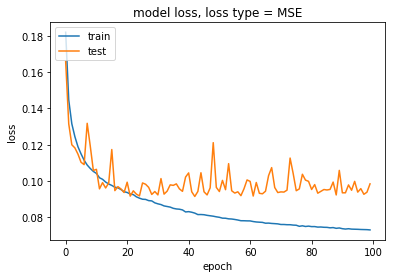

In [70]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D, Conv1D , UpSampling2D
import keras 

#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder(handle_unknown='ignore')





num_classes = 4 

batch_size = 32

#epochs = 5
data_augmentation = True
#num_predictions = 20
# each input is a pixel 
x = np.reshape(gray_birds,( 6000,32,32,1))
# must 1 hot encode labels 
dum = pd.get_dummies(labels.astype(str))

y = np.reshape(dum.values, (6000,32,32,4))








#model = Sequential()
#model.add(Conv2D(32, (5, 5), padding='same', input_shape=x.shape[1:]))
#model.add(Activation('relu'))
#model.add(Conv2D(32, (5, 5)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Conv2D(64, (5, 5), padding='same'))
#model.add(Activation('relu'))
#model.add(Conv2D(64, (5, 5)))
#model.add(Activation('relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.25))

#model.add(Flatten())
#model.add(Dense(4096))
#model.add(Activation('relu'))
#model.add(Dropout(0.5))
#model.add(Dense(num_classes))
#model.add(Activation('softmax'))

# initiate RMSprop optimizer

#model.compile(loss='categorical_crossentropy',
 #             optimizer="adam",
  #            metrics=['accuracy'])


#model.fit(x,y, batch_size = 100, epochs = 5, validation_split = .1)

model = Sequential()
model.add(InputLayer(input_shape=(32, 32, 1)))
model.add(Conv2D(8, (5, 5), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(16, (5, 5), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(4, (5, 5), activation='tanh', padding='same'))

model.add(Reshape((32,32,4)))

model.compile(optimizer='rmsprop',loss='mse')
#model.fit(x=x, 
#    y=y,
#    batch_size=1,
#    epochs=3)

history = model.fit(x, y, validation_split=0.2, epochs=100, batch_size=32)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss, loss type = MSE')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

we can see that the best train and test errors we achieve are .0731, and .0985, with a validation set of 1200, and a train of 4800. 

now to create new images with the predicitons 

In [72]:
predict_y = model.predict(x)
print(predict_y[600][31])



[[ 1.89424738e-01  4.74403583e-04  1.87361669e-02  6.70211434e-01]
 [ 7.73012787e-02 -1.78246200e-03  2.91020353e-03  8.11192513e-01]
 [ 7.62382001e-02 -5.53752109e-03  4.41569183e-03  8.75019133e-01]
 [ 9.11156237e-02 -3.35121853e-03  5.29110373e-04  8.61215830e-01]
 [ 1.18296169e-01  1.19754986e-03  2.35498212e-02  7.60865152e-01]
 [ 2.61157423e-01  1.59321306e-03  4.73405048e-02  5.91956973e-01]
 [ 4.80920285e-01  2.62060435e-03  1.39054880e-01  3.03710938e-01]
 [ 4.77043927e-01  2.07180697e-02  2.52471775e-01  1.67565167e-01]
 [ 3.56923312e-01  3.04504186e-02  4.52746719e-01  5.51326722e-02]
 [ 2.02919275e-01  5.75695485e-02  5.84495068e-01  4.01588120e-02]
 [ 1.49347574e-01  6.41057715e-02  6.79336190e-01  1.71963088e-02]
 [ 1.34564772e-01  7.02557489e-02  7.39481568e-01  2.59548016e-02]
 [ 9.40403044e-02  9.12054479e-02  7.91187048e-01  2.34143920e-02]
 [ 9.57781076e-02  9.06171501e-02  8.07464719e-01  1.85489915e-02]
 [ 9.56226662e-02  6.99467137e-02  8.12056541e-01  1.45956716e

In [73]:
pred_y = [[[np.argmax(predict_y[i][j][l]) for l in range (32)] for j in range(32)] for i in range(1000)]
print(pred_y[0][0])

[0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0]


In [74]:
pred_y = [[COLORS[l] for l in j] for j in pred_y]
art_color = np.array(pred_y,int)
print(art_color[0][0][:10])
print(art_color.shape)

[[109 109  83]
 [109 109  83]
 [109 109  83]
 [109 109  83]
 [109 109  83]
 [109 109  83]
 [109 109  83]
 [109 109  83]
 [156 156 136]
 [156 156 136]]
(1000, 32, 32, 3)


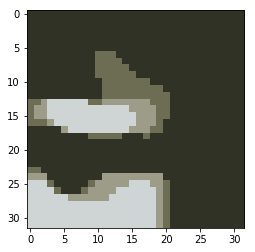

In [75]:
plt.imshow(art_color[1])

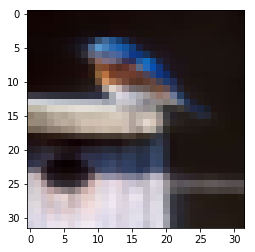

In [76]:
plt.imshow(birds[1])

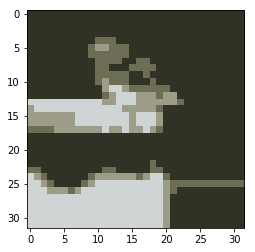

In [77]:
plt.imshow(birds_4_colors[1])

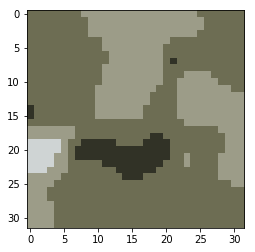

In [78]:
plt.imshow(art_color[0])

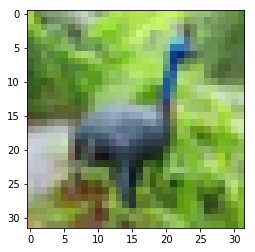

In [79]:
plt.imshow(birds[0])

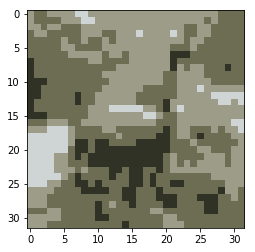

In [80]:
plt.imshow(birds_4_colors[0])

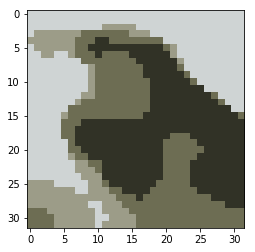

In [81]:
plt.imshow(art_color[2])

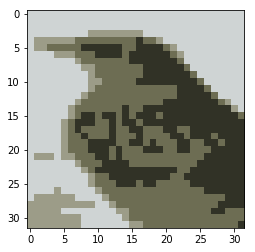

In [82]:
plt.imshow(birds_4_colors[2])

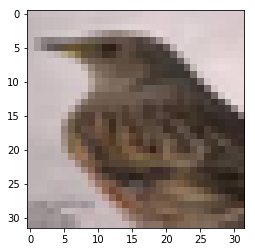

In [83]:
plt.imshow(birds[2])

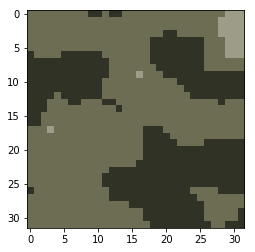

In [84]:
plt.imshow(art_color[3])

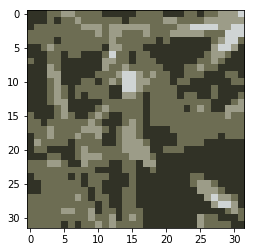

In [85]:
plt.imshow(birds_4_colors[3])

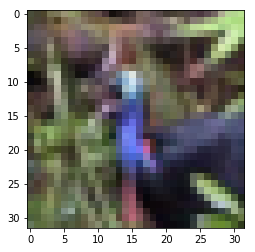

In [86]:
plt.imshow(birds[3])

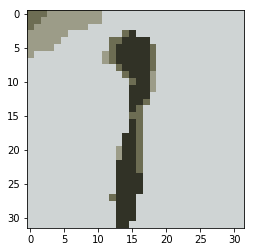

In [87]:
plt.imshow(art_color[4])

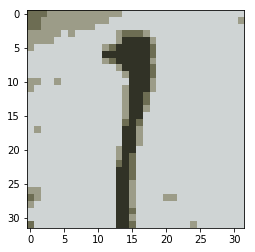

In [88]:
plt.imshow(birds_4_colors[4])

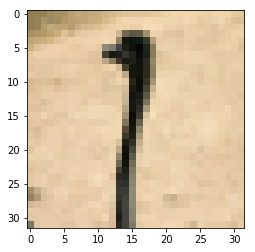

In [89]:
plt.imshow(birds[4])

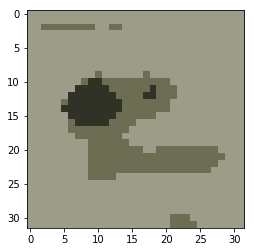

In [90]:
plt.imshow(art_color[5])

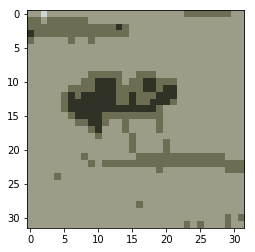

In [91]:
plt.imshow(birds_4_colors[5])

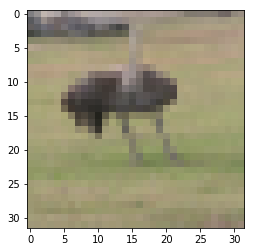

In [92]:
plt.imshow(birds[5])

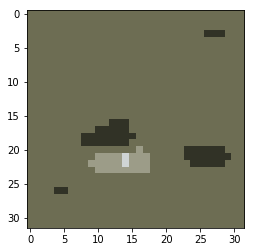

In [93]:
plt.imshow(art_color[6])

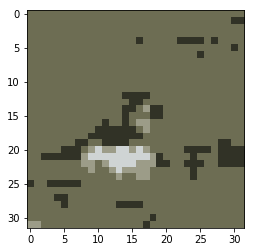

In [94]:
plt.imshow(birds_4_colors[6])

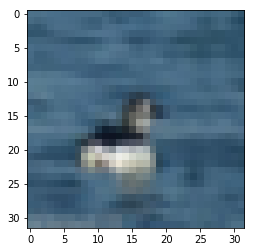

In [95]:
plt.imshow(birds[6])

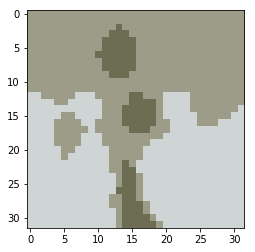

In [96]:
plt.imshow(art_color[7])

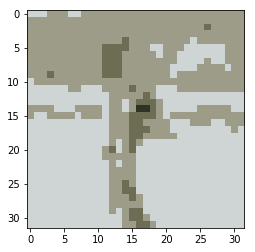

In [97]:
plt.imshow(birds_4_colors[7])

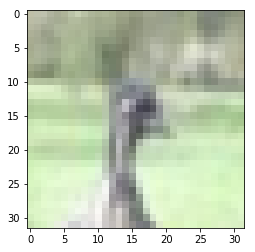

In [98]:
plt.imshow(birds[7])

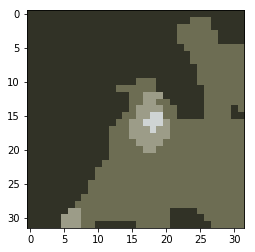

In [99]:
plt.imshow(art_color[8])

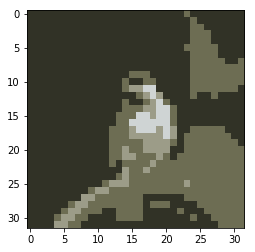

In [100]:
plt.imshow(birds_4_colors[8])

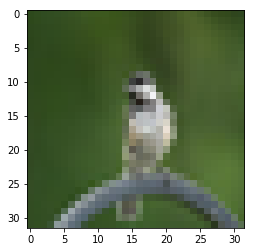

In [101]:
plt.imshow(birds[8])

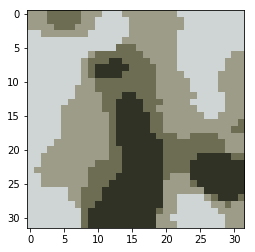

In [102]:
plt.imshow(art_color[9])

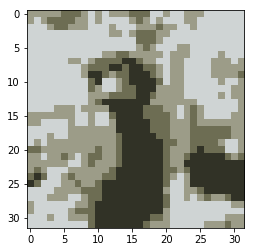

In [103]:
plt.imshow(birds_4_colors[9])

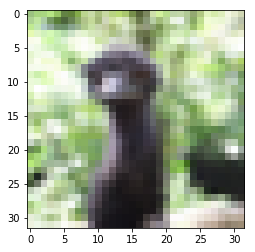

In [104]:
plt.imshow(birds[9])